<a href="https://colab.research.google.com/github/SihyunPark01/Colab/blob/main/Ch02.%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D%20/%209_%EA%B2%B0%EC%A0%95%ED%8A%B8%EB%A6%AC_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
"""
날짜 : 21/10/20
이름 : 박시현
내용 : 결정트리(decision tree) 실습하기
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree, metrics
import pydotplus
from sklearn.model_selection import train_test_split

In [10]:
# 데이터 불러오기
df_iris = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/file/iris.csv')
df_iris

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [11]:
# 학습데이터
iris_train_data = df_iris.iloc[:, 0:4]
iris_train_label = df_iris.iloc[:, 4]
iris_train_label

train_data, test_data, train_label, test_label = train_test_split(iris_train_data, iris_train_label)
train_data

,sepal.length,sepal.width,petal.length,petal.width
75,6.6,3.0,4.4,1.4
83,6.0,2.7,5.1,1.6
48,5.3,3.7,1.5,0.2
27,5.2,3.5,1.5,0.2
45,4.8,3.0,1.4,0.3
...,...,...,...,...
120,6.9,3.2,5.7,2.3
112,6.8,3.0,5.5,2.1
137,6.4,3.1,5.5,1.8
93,5.0,2.3,3.3,1.0


In [13]:
# 학습하기
model = tree.DecisionTreeClassifier()
model.fit(train_data, train_label)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [14]:
# 테스트하기
result = model.predict(test_data)

In [15]:
# 성능평가하기
score =  metrics.accuracy_score(result, test_label)
score

0.9736842105263158

In [16]:
# 모델 설명 확인
model_text = tree.export_text(model)
print(model_text)

|--- feature_2 <= 2.45
|   |--- class: Setosa
|--- feature_2 >  2.45
|   |--- feature_2 <= 4.75
|   |   |--- feature_3 <= 1.65
|   |   |   |--- class: Versicolor
|   |   |--- feature_3 >  1.65
|   |   |   |--- class: Virginica
|   |--- feature_2 >  4.75
|   |   |--- feature_3 <= 1.75
|   |   |   |--- feature_1 <= 2.65
|   |   |   |   |--- class: Virginica
|   |   |   |--- feature_1 >  2.65
|   |   |   |   |--- feature_2 <= 5.05
|   |   |   |   |   |--- class: Versicolor
|   |   |   |   |--- feature_2 >  5.05
|   |   |   |   |   |--- feature_0 <= 6.15
|   |   |   |   |   |   |--- class: Versicolor
|   |   |   |   |   |--- feature_0 >  6.15
|   |   |   |   |   |   |--- class: Virginica
|   |   |--- feature_3 >  1.75
|   |   |   |--- feature_2 <= 4.85
|   |   |   |   |--- feature_0 <= 5.95
|   |   |   |   |   |--- class: Versicolor
|   |   |   |   |--- feature_0 >  5.95
|   |   |   |   |   |--- class: Virginica
|   |   |   |--- feature_2 >  4.85
|   |   |   |   |--- class: Virginica



[Text(103.01538461538462, 302.86285714285714, 'petal_length <= 2.45\ngini = 0.665\nsamples = 112\nvalue = [40, 34, 38]\nclass = Setosa'),
 Text(77.26153846153846, 256.2685714285715, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]\nclass = Setosa'),
 Text(128.76923076923077, 256.2685714285715, 'petal_length <= 4.75\ngini = 0.498\nsamples = 72\nvalue = [0, 34, 38]\nclass = Virginica'),
 Text(51.50769230769231, 209.67428571428573, 'petal_width <= 1.65\ngini = 0.062\nsamples = 31\nvalue = [0, 30, 1]\nclass = Vircicolor'),
 Text(25.753846153846155, 163.08, 'gini = 0.0\nsamples = 30\nvalue = [0, 30, 0]\nclass = Vircicolor'),
 Text(77.26153846153846, 163.08, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = Virginica'),
 Text(206.03076923076924, 209.67428571428573, 'petal_width <= 1.75\ngini = 0.176\nsamples = 41\nvalue = [0, 4, 37]\nclass = Virginica'),
 Text(128.76923076923077, 163.08, 'sepal_width <= 2.65\ngini = 0.49\nsamples = 7\nvalue = [0, 3, 4]\nclass = Virginica'),
 Text(103.0153846

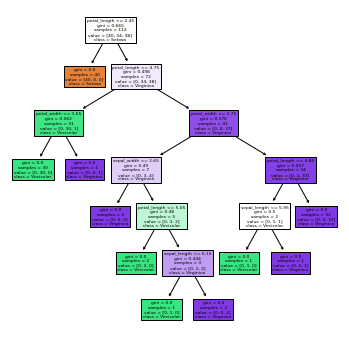

In [21]:
# 모델 시각화
fig = plt.figure(figsize=(6, 6))
tree.plot_tree(model, 
               feature_names=['sepal_length','sepal_width','petal_length','petal_width'],
               class_names=['Setosa','Vircicolor','Virginica'],
               filled=True)
